In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train_BRCpofr.csv")
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [4]:
train_df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [5]:
## Here in training data it does't has any missing value 

In [6]:
train_df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [7]:
test_df = pd.read_csv("test_koRSKBP.csv")
test_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [9]:
test_df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [10]:
# Here their is not any missing value

In [11]:
## Exploratory data analysis

In [12]:
## Panda Proffiling of the train data set

In [13]:
import pandas_profiling as pp

profile = pp.ProfileReport(train_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
## Segerating the numerical and categorical feature

In [15]:
# Numerical feature in the dataset

num_feature = [feature for feature in train_df.columns if train_df[feature].dtypes!="O"]

# categorical feature in the dataset

categorical_feature = [feature for feature in train_df.columns if train_df[feature].dtypes=="O"]

In [16]:
## Handaling the categorical feature to numerical feature

In [17]:
num_feature

['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

In [18]:
categorical_feature

['gender',
 'area',
 'qualification',
 'income',
 'num_policies',
 'policy',
 'type_of_policy']

# Univariate analysis of the Numerical Feature

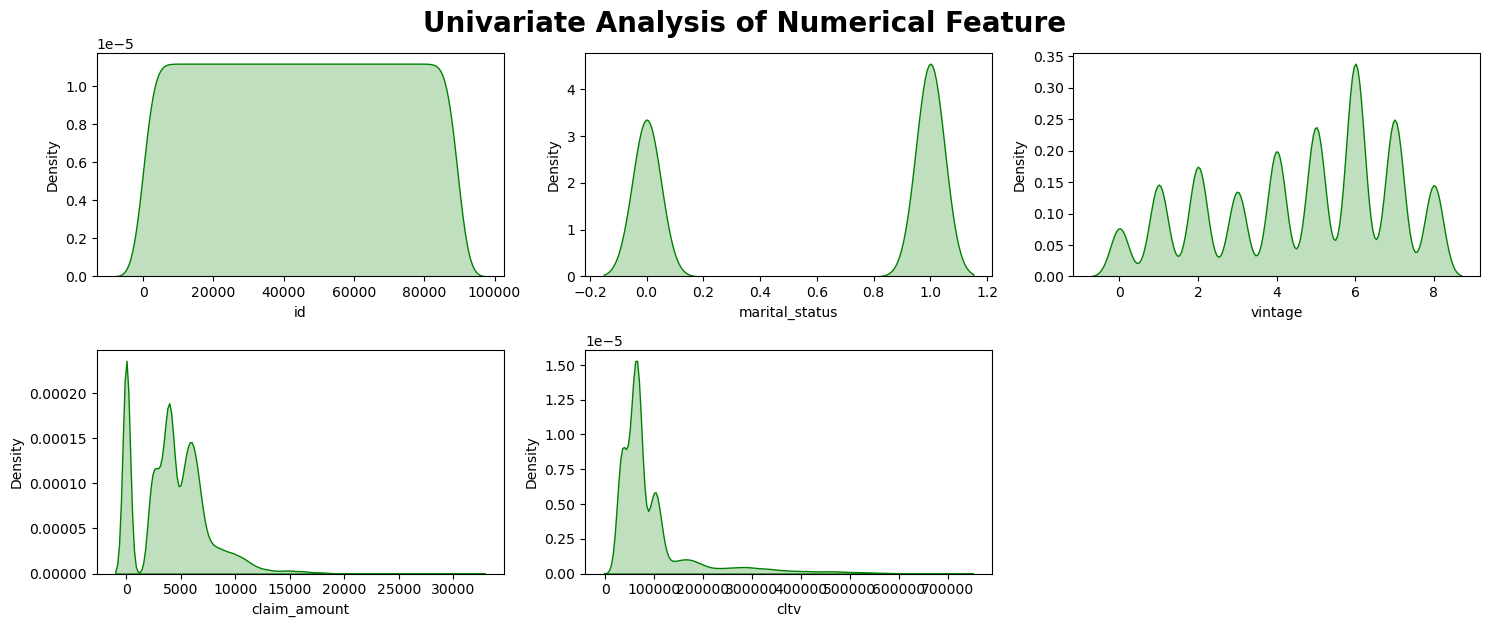

In [19]:
plt.figure(figsize = (15,15))
plt.suptitle("Univariate Analysis of Numerical Feature",fontsize = 20,fontweight = 'bold')

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = train_df[num_feature[i]],shade = True,color = 'g')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

# Numerical Feature analysis
1. Here in the marital status it has the union distribution between the 0 and 1

2. In the vintange the number of year from the first policy is depend on the on the customer but the distribution in the 6 year is high.

3. Claim amount from the customer is right skeweed

4. cltv is highly skeweed toward the right.
 

In [20]:
# Univariate analysis of the categorical feature

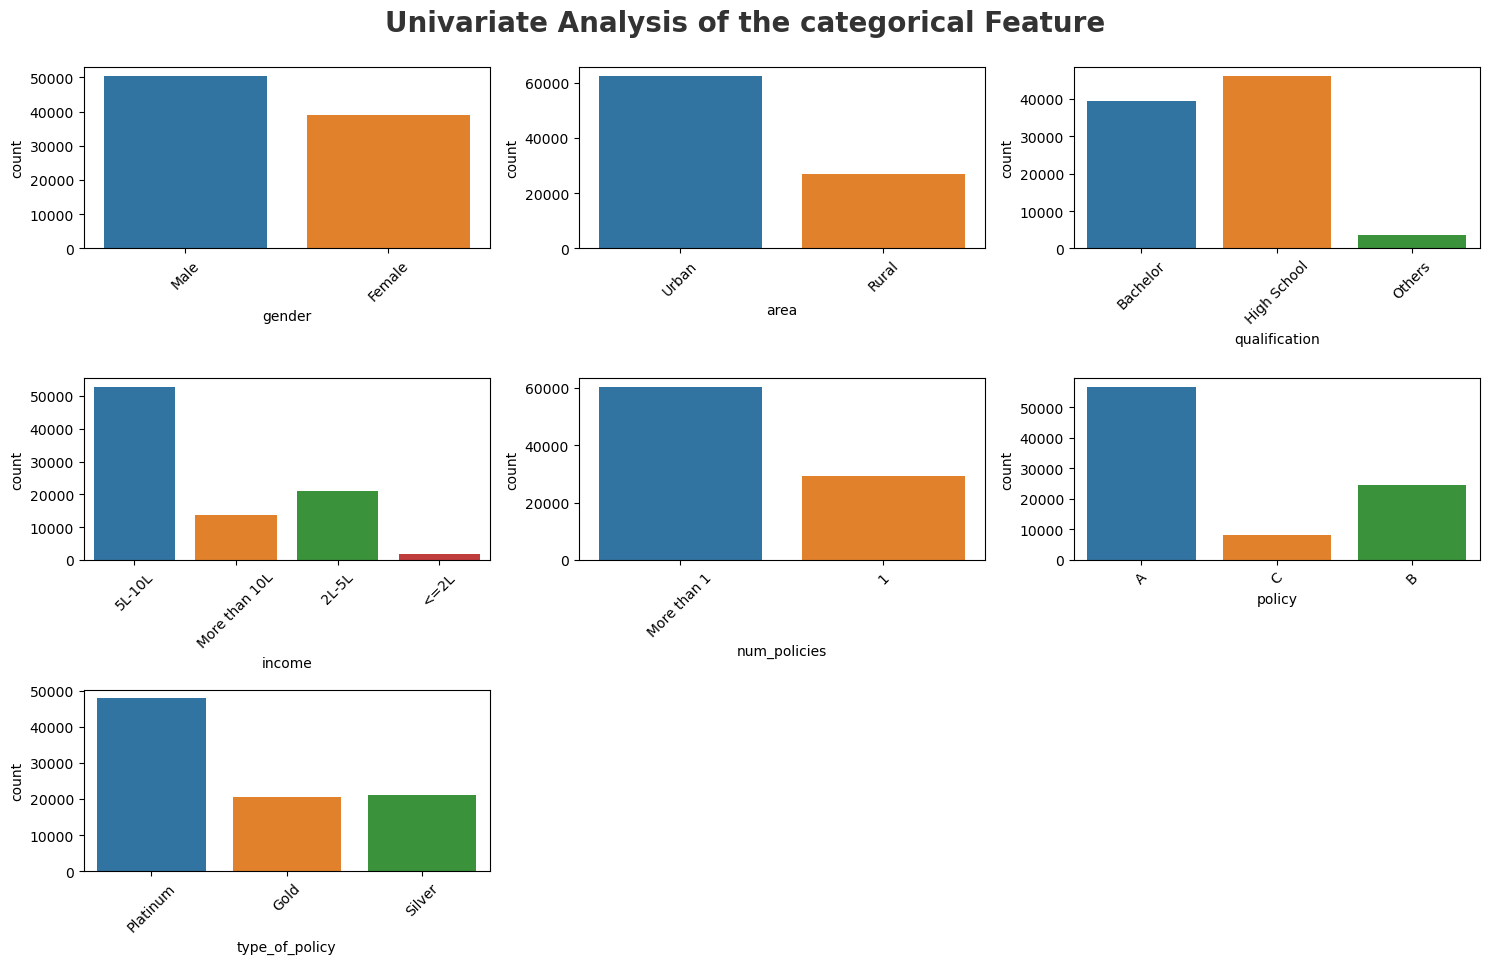

In [21]:
plt.figure(figsize = (15,15))
plt.suptitle("Univariate Analysis of the categorical Feature",fontsize = 20 , fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(categorical_feature)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=train_df[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Multivariate Analysis
Multivariate analysis is the analysis of more than one variable

In [22]:
train_df[(list(train_df.columns)[1:])].corr()

,marital_status,vintage,claim_amount,cltv
marital_status,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.011686,1.000000,0.009579,0.020608
claim_amount,-0.114924,0.009579,1.000000,0.180344
cltv,-0.077744,0.020608,0.180344,1.000000


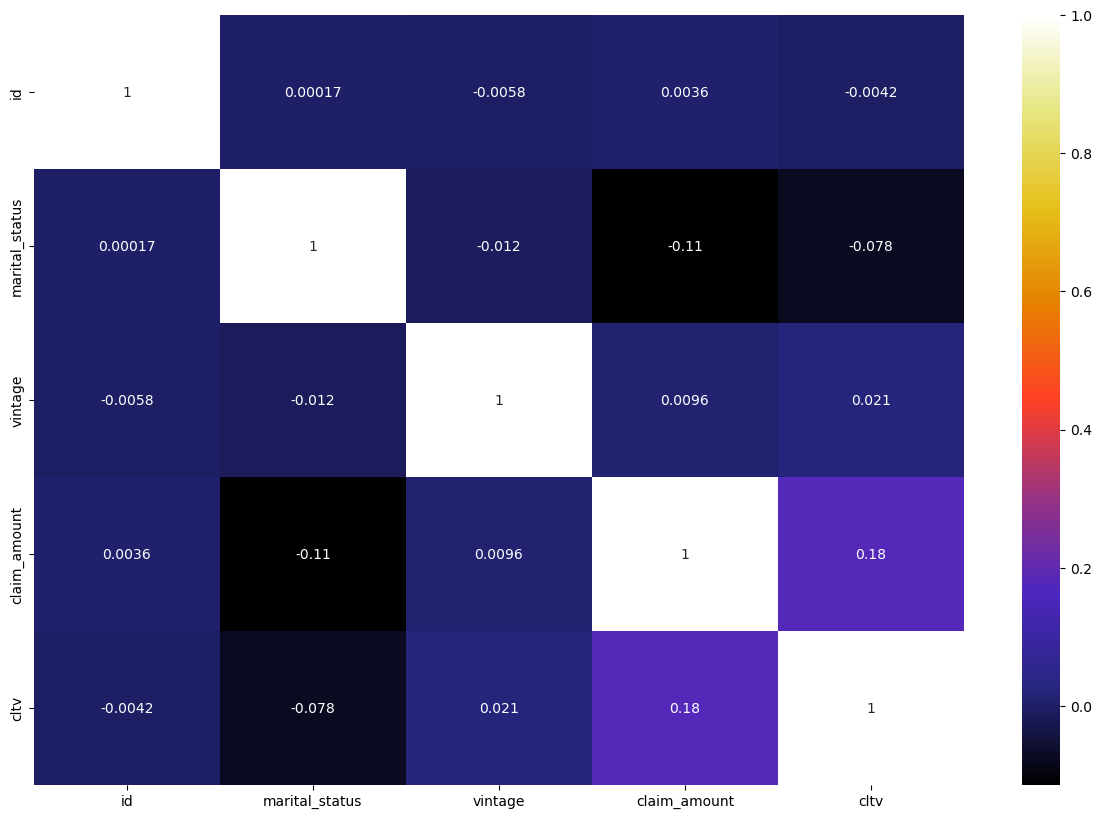

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(train_df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [24]:
train_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [25]:
## Checking the multicollinearity for categorical features

In [26]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_feature:
    if chi2_contingency(pd.crosstab(train_df['cltv'], train_df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Reject Null Hypothesis
1,area,Fail to Reject Null Hypothesis
2,qualification,Fail to Reject Null Hypothesis
3,income,Reject Null Hypothesis
4,num_policies,Reject Null Hypothesis
5,policy,Reject Null Hypothesis
6,type_of_policy,Fail to Reject Null Hypothesis


In [27]:
# Checking the outliers

In [28]:
num_feature

['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

<AxesSubplot:xlabel='cltv'>

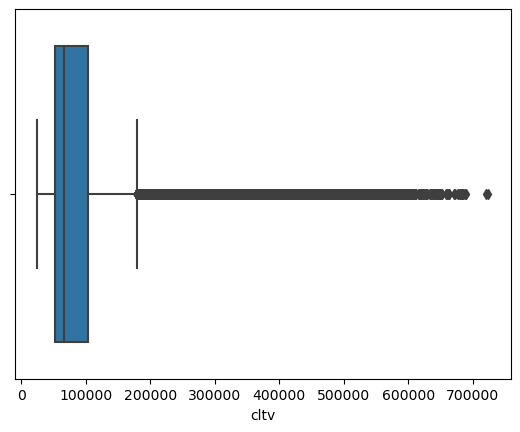

In [29]:
sns.boxplot(train_df['cltv'])

<AxesSubplot:xlabel='claim_amount'>

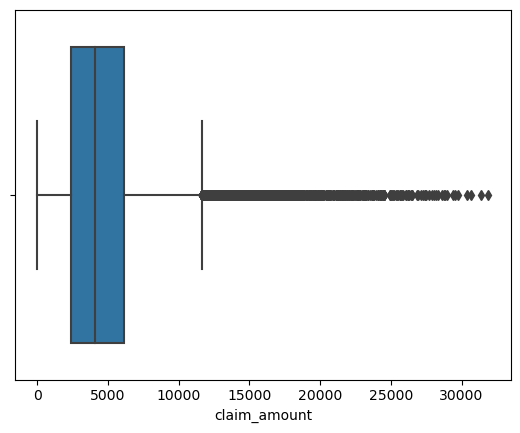

In [30]:
sns.boxplot(train_df['claim_amount'])

In [31]:
from sklearn import preprocessing

In [32]:
label_encoder = preprocessing.LabelEncoder()
for i in categorical_feature:
    train_df[i]= label_encoder.fit_transform(train_df[i]) 

In [33]:
train_df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,1,1,5,5790,1,0,1,64308
1,2,1,0,1,1,0,8,5080,1,0,1,515400
2,3,1,1,0,1,1,8,2599,1,0,1,64212
3,4,0,0,1,1,0,7,0,1,0,1,97920
4,5,1,1,1,3,1,6,3508,1,0,0,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,1,0,1,3,0,6,0,1,1,1,95736
89388,89389,1,1,0,1,1,0,3897,1,0,1,67596
89389,89390,0,1,0,1,0,4,3363,1,1,1,114120
89390,89391,0,0,1,0,0,8,0,1,1,1,71772


In [34]:
train_df.dtypes

id                int64
gender            int32
area              int32
qualification     int32
income            int32
marital_status    int64
vintage           int64
claim_amount      int64
num_policies      int32
policy            int32
type_of_policy    int32
cltv              int64
dtype: object

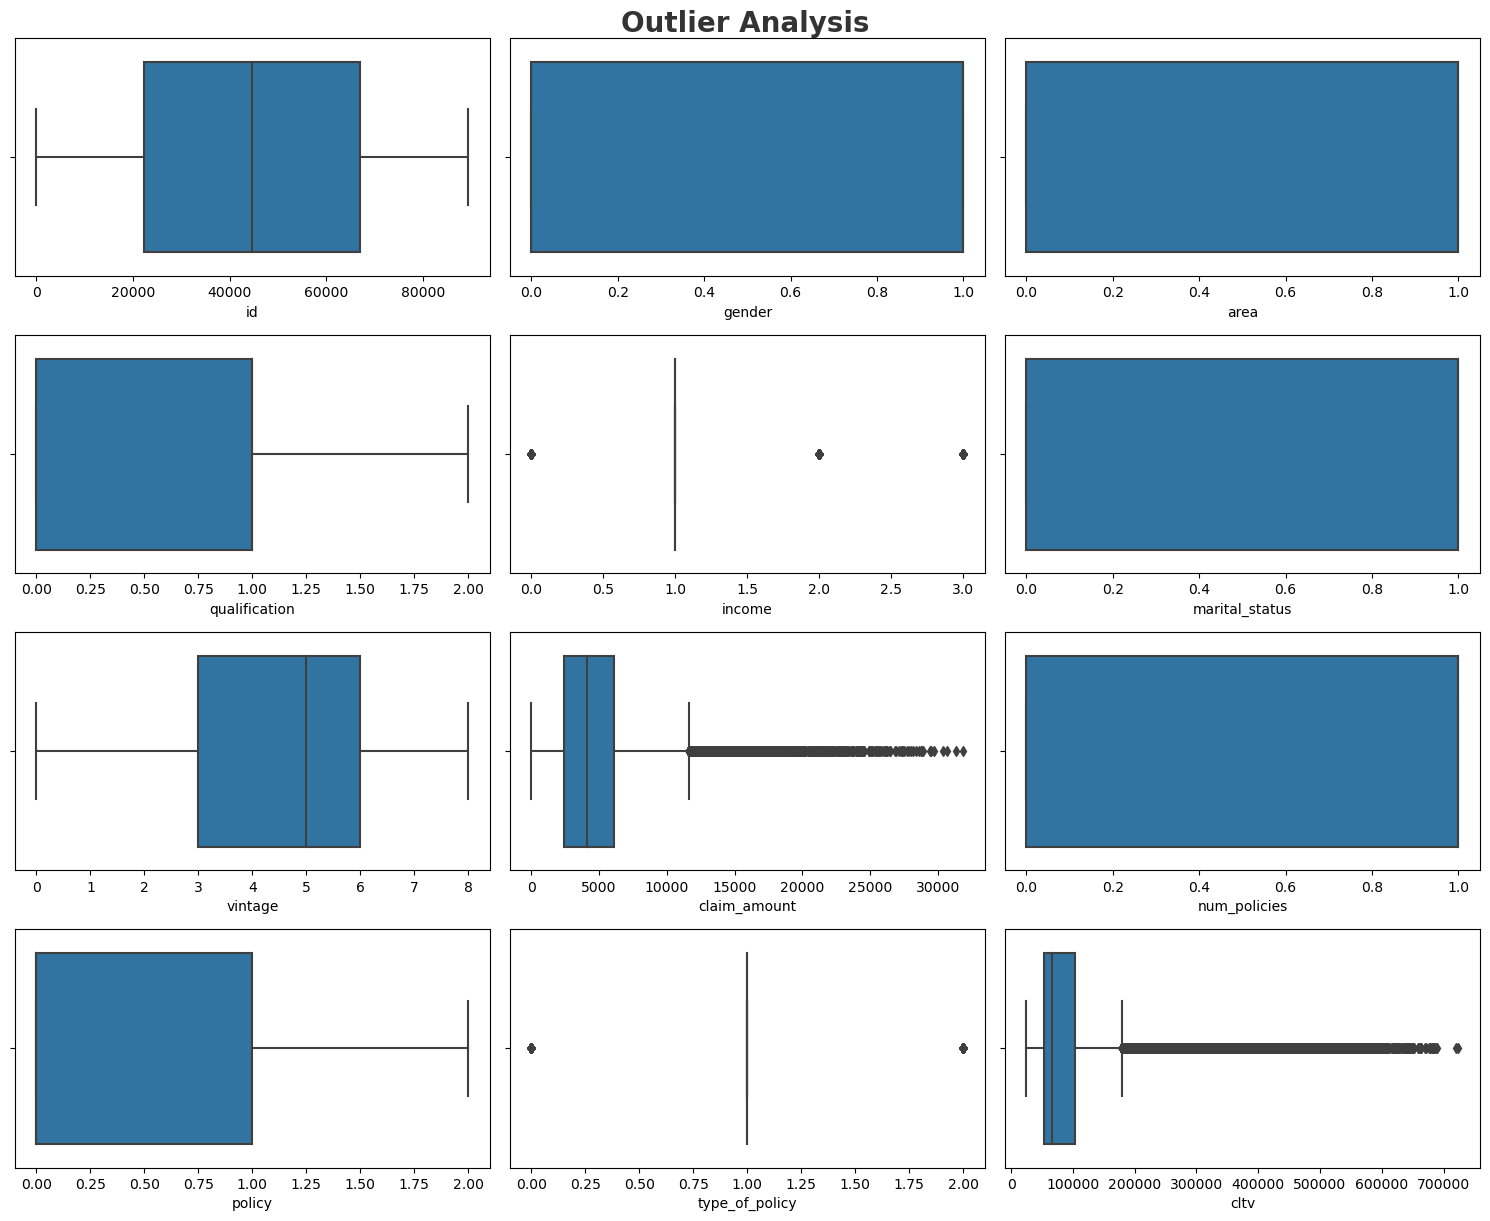

In [35]:
plt.figure(figsize =(15,15))
plt.suptitle('Outlier Analysis',fontsize = 20, fontweight='bold', alpha=0.8 )
for i in range (0, len(train_df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(train_df[train_df.columns[i]])
    plt.tight_layout()

In [36]:
# Here It show that claim_amount and cltv has huge outliers

In [37]:
def outlier_threshold(dataframe,variable):
    quantile1 = dataframe[variable].quantile(0.25)
    quantile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3+1.5*interquantile_range
    lower_limit = quantile1-1.5*interquantile_range
    return up_limit , lower_limit

In [38]:
def replcae_with_outliers(dataframe,numerical_columns):
    for variable in numerical_columns:
        up_limit , lower_limit = outlier_threshold(dataframe,variable)
        dataframe.loc[(dataframe[variable]<lower_limit),variable] = lower_limit
        dataframe.loc[(dataframe[variable]>up_limit),variable] = up_limit

In [39]:
replcae_with_outliers(train_df,train_df.columns)

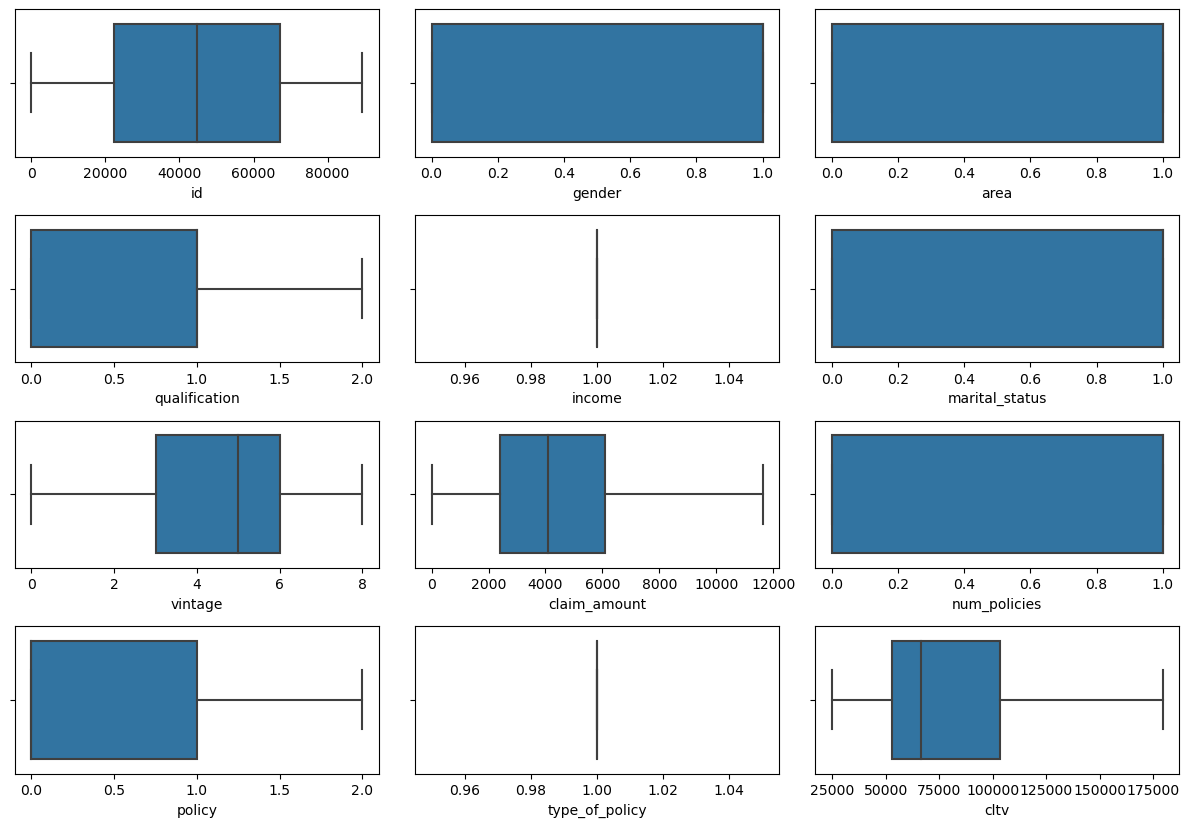

In [40]:
plt.figure(figsize =(12,10))
for i in range (0, len(train_df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(train_df[train_df.columns[i]])
    plt.tight_layout()

In [41]:
# For the test data set

In [42]:
test_df = pd.read_csv("test_koRSKBP.csv")
test_df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [43]:
# Numerical feature in the dataset

num_feature = [feature for feature in test_df.columns if test_df[feature].dtypes!="O"]

# categorical feature in the dataset

categorical_feature = [feature for feature in test_df.columns if test_df[feature].dtypes=="O"]

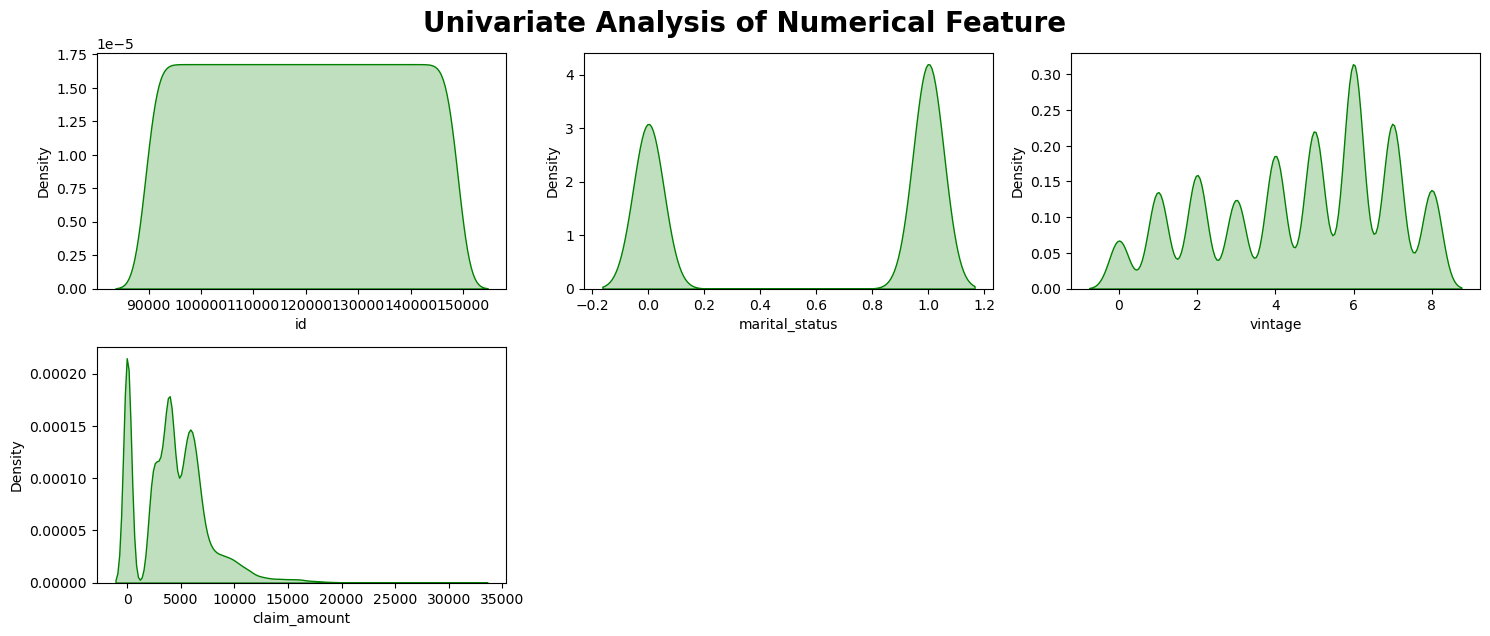

In [44]:
plt.figure(figsize = (15,15))
plt.suptitle("Univariate Analysis of Numerical Feature",fontsize = 20,fontweight = 'bold')

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = test_df[num_feature[i]],shade = True,color = 'g')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

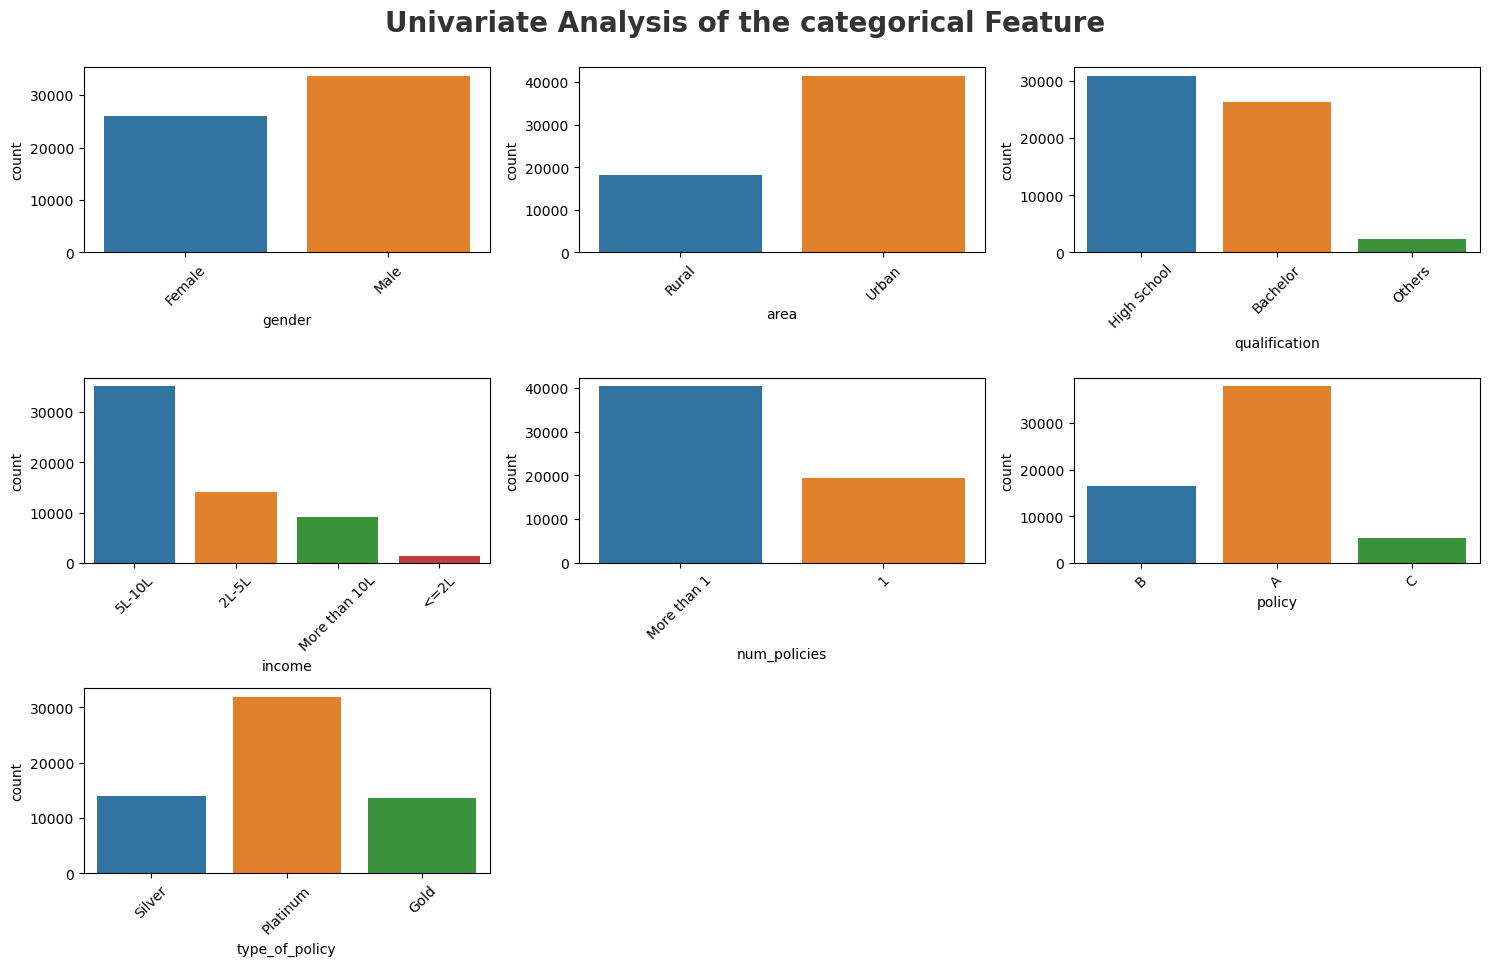

In [45]:
plt.figure(figsize = (15,15))
plt.suptitle("Univariate Analysis of the categorical Feature",fontsize = 20 , fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(categorical_feature)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=test_df[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [46]:
test_df[(list(test_df.columns)[1:])].corr()

,marital_status,vintage,claim_amount
marital_status,1.000000,-0.009528,-0.110682
vintage,-0.009528,1.000000,0.004936
claim_amount,-0.110682,0.004936,1.000000


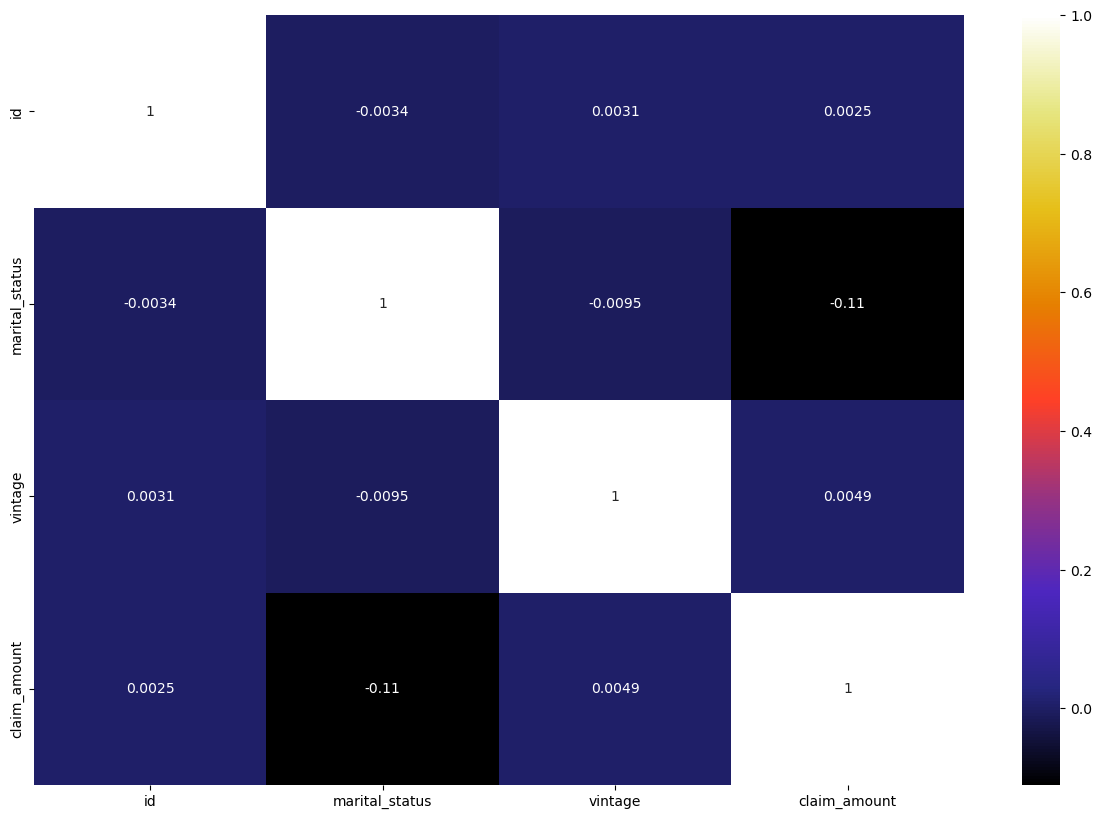

In [47]:
plt.figure(figsize = (15,10))
sns.heatmap(test_df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [49]:
label_encoder = preprocessing.LabelEncoder()
for i in categorical_feature:
    test_df[i]= label_encoder.fit_transform(test_df[i]) 

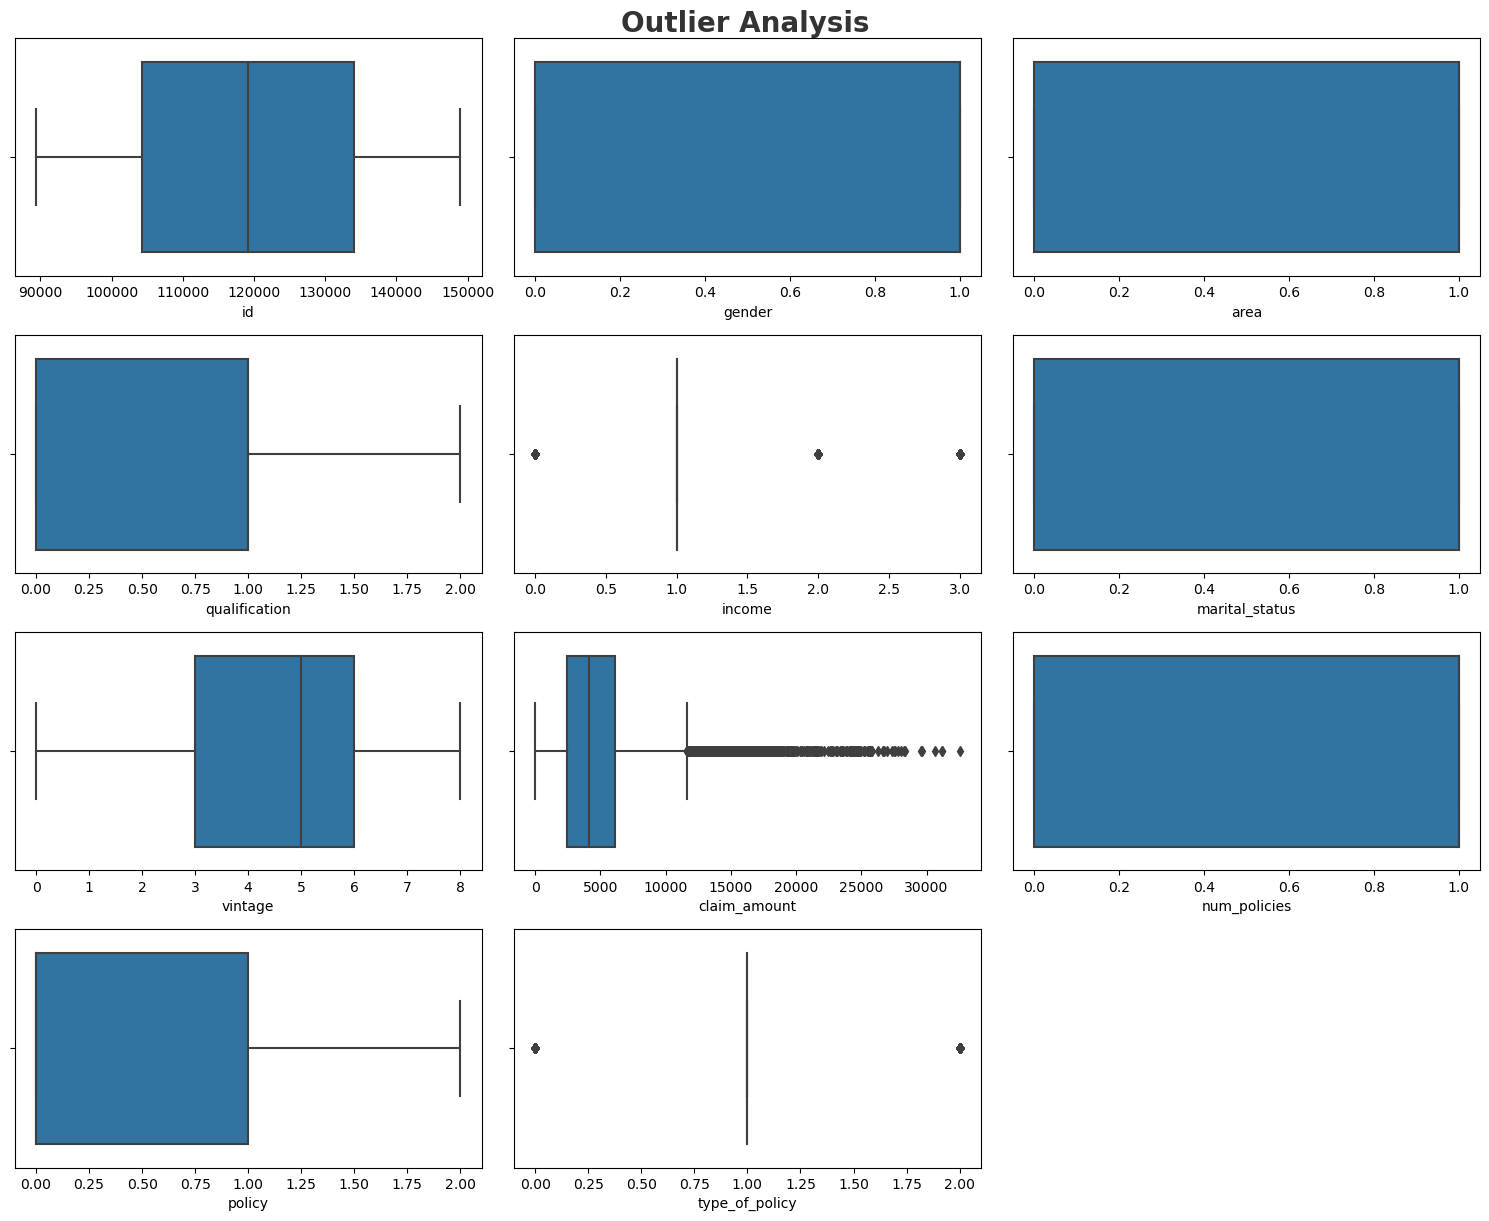

In [50]:
plt.figure(figsize =(15,15))
plt.suptitle('Outlier Analysis',fontsize = 20, fontweight='bold', alpha=0.8 )
for i in range (0, len(test_df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(test_df[test_df.columns[i]])
    plt.tight_layout()

In [51]:
def outlier_threshold(dataframe,variable):
    quantile1 = dataframe[variable].quantile(0.25)
    quantile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3+1.5*interquantile_range
    lower_limit = quantile1-1.5*interquantile_range
    return up_limit , lower_limit

In [52]:
def replcae_with_outliers(dataframe,numerical_columns):
    for variable in numerical_columns:
        up_limit , lower_limit = outlier_threshold(dataframe,variable)
        dataframe.loc[(dataframe[variable]<lower_limit),variable] = lower_limit
        dataframe.loc[(dataframe[variable]>up_limit),variable] = up_limit

In [55]:
replcae_with_outliers(test_df,test_df.columns)

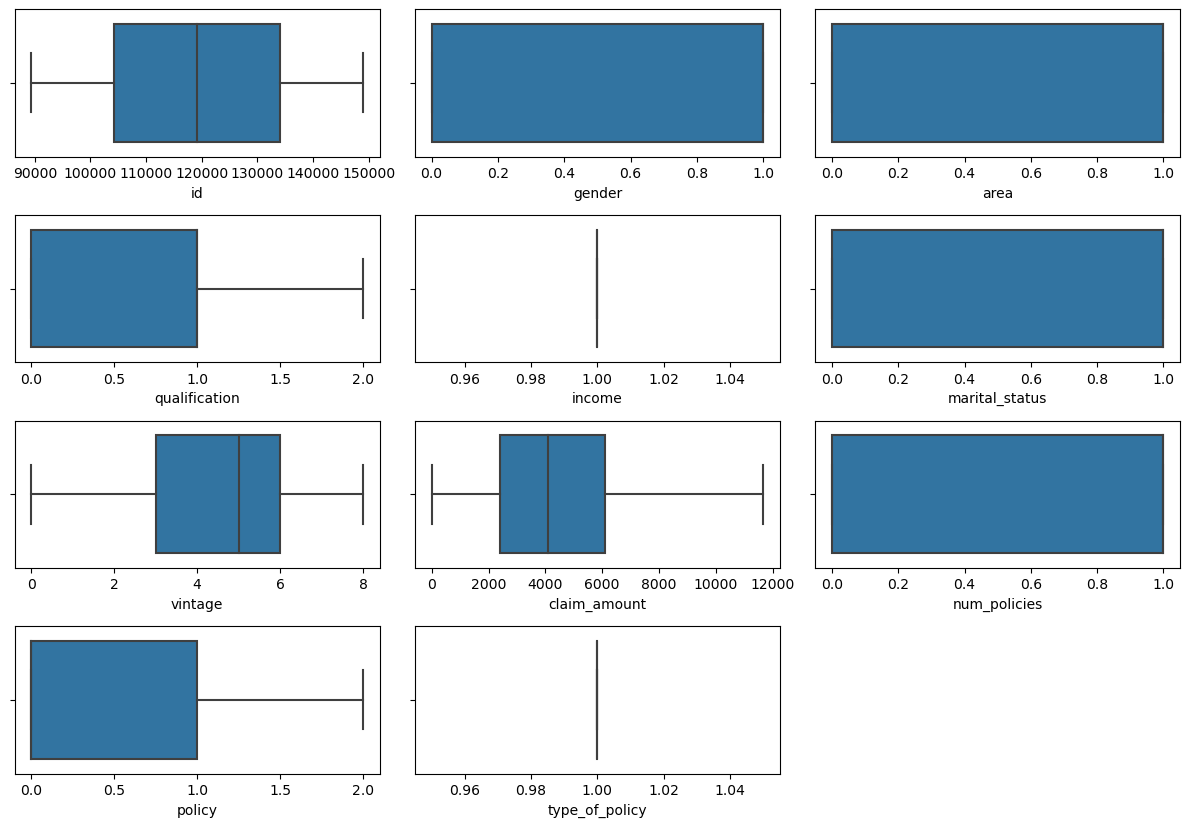

In [56]:
plt.figure(figsize =(12,10))
for i in range (0, len(test_df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(test_df[test_df.columns[i]])
    plt.tight_layout()

In [98]:
train_df.to_csv("train_csv")
test_df.to_csv("test_csv")

In [57]:
# Let seperate the X anf y variable

In [58]:
X = train_df.drop("cltv",axis = 1)
y = train_df["cltv"]

In [59]:
X

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1.0,1.0,1.0,0.0,1,1.0,5.0,5790,1.0,0.0,1
1,2.0,1.0,0.0,1.0,1,0.0,8.0,5080,1.0,0.0,1
2,3.0,1.0,1.0,0.0,1,1.0,8.0,2599,1.0,0.0,1
3,4.0,0.0,0.0,1.0,1,0.0,7.0,0,1.0,0.0,1
4,5.0,1.0,1.0,1.0,1,1.0,6.0,3508,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
89387,89388.0,1.0,0.0,1.0,1,0.0,6.0,0,1.0,1.0,1
89388,89389.0,1.0,1.0,0.0,1,1.0,0.0,3897,1.0,0.0,1
89389,89390.0,0.0,1.0,0.0,1,0.0,4.0,3363,1.0,1.0,1
89390,89391.0,0.0,0.0,1.0,1,0.0,8.0,0,1.0,1.0,1


In [60]:
y

0         64308
1        179346
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)

In [63]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [64]:
y_train.shape

(71513, 1)

In [65]:
y_test.shape

(17879, 1)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler_test = StandardScaler()

In [67]:
scaler_test.fit_transform(y_train)

array([[ 1.46689412],
       [ 0.35433004],
       [ 0.1585334 ],
       ...,
       [ 2.10538984],
       [-0.77940831],
       [-1.07820078]])

In [68]:
scaler_test.transform(y_test)

array([[ 0.28976159],
       [-0.49290215],
       [ 0.43223044],
       ...,
       [-1.12996011],
       [ 0.24819728],
       [-0.99690205]])

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71513, 11)
(17879, 11)
(71513, 1)
(17879, 1)


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

In [73]:
y_train_tf = scaler1.fit_transform(y_train)
y_test_tf = scaler1.transform(y_test)

In [74]:
X_train_tf

array([[-0.22380501,  0.87789153,  0.6572288 , ..., -1.44196791,
        -0.69861223,  0.        ],
       [ 0.32259143, -1.13909289, -1.52154013, ...,  0.69349671,
        -0.69861223,  0.        ],
       [-1.61273376,  0.87789153,  0.6572288 , ..., -1.44196791,
        -0.69861223,  0.        ],
       ...,
       [ 1.35587042,  0.87789153,  0.6572288 , ...,  0.69349671,
        -0.69861223,  0.        ],
       [ 0.44165796,  0.87789153, -1.52154013, ...,  0.69349671,
         0.82590201,  0.        ],
       [-0.24337175,  0.87789153, -1.52154013, ..., -1.44196791,
         0.82590201,  0.        ]])

In [75]:
X_train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
38913,38914.0,1.0,1.0,1.0,1,1.0,6.0,4284,0.0,0.0,1
53015,53016.0,0.0,0.0,1.0,1,1.0,7.0,0,1.0,0.0,1
3066,3067.0,1.0,1.0,0.0,1,1.0,7.0,3932,0.0,0.0,1
43629,43630.0,0.0,1.0,0.0,1,0.0,3.0,6126,1.0,1.0,1
18251,18252.0,1.0,1.0,0.0,1,1.0,5.0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
65615,65616.0,0.0,1.0,0.0,1,0.0,5.0,4162,1.0,1.0,1
77655,77656.0,0.0,1.0,0.0,1,1.0,5.0,6593,0.0,0.0,1
79683,79684.0,1.0,1.0,1.0,1,1.0,6.0,8287,1.0,0.0,1
56088,56089.0,1.0,0.0,0.0,1,0.0,1.0,2128,1.0,1.0,1


In [76]:
y_train

array([[150036],
       [ 98964],
       [ 89976],
       ...,
       [179346],
       [ 46920],
       [ 33204]], dtype=int64)

# Model Building

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

In [78]:
Models = {
    "LR":LinearRegression(),
    "KNNR":KNeighborsRegressor(),
    "SVR":SVR(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor(n_estimators=625),
    "GBR":GradientBoostingRegressor(n_estimators=4000,alpha=0.01),
    "XGBR":XGBRegressor(n_estimators=550)
}

for name, model in Models.items():
    print(f"Using Model: {name}" )
    model.fit(X_train_tf, y_train)
    print(f'Training Score: {model.score(X_train_tf, y_train)}')
    Predictions = model.predict(X_test_tf)
    print(f'Testing Score: {r2_score(y_test, Predictions)}')
    print(f'MSE: {mean_squared_error(y_test, Predictions)}')
    print('-'*45)

Using Model: LR
Training Score: 0.2769051285903533
Testing Score: 0.275693375348838
MSE: 1507737034.2219932
---------------------------------------------
Using Model: KNNR
Training Score: 0.43330009257004287
Testing Score: 0.1442365135536816
MSE: 1781381333.7292867
---------------------------------------------
Using Model: SVR
Training Score: -0.09869267714148466
Testing Score: -0.09103414138359223
MSE: 2271127343.8329954
---------------------------------------------
Using Model: DT
Training Score: 1.0
Testing Score: -0.4586851282608633
MSE: 3036439974.8614573
---------------------------------------------
Using Model: RF
Training Score: 0.8937899473625344
Testing Score: 0.21885229257732453
MSE: 1626059030.2428963
---------------------------------------------
Using Model: GBR
Training Score: 0.41192818659011743
Testing Score: 0.254164418967606
MSE: 1552552315.1256666
---------------------------------------------
Using Model: XGBR
Training Score: 0.5429497790559479
Testing Score: 0.22262

In [97]:
import joblib
joblib.dump(model, RF'.h5')

['.h5']

In [103]:
train = pd.read_csv('train_csv')
test  = pd.read_csv("test_csv")


test['cltv']=train['cltv'].mean()


sample_submission = test[['id','cltv']]
sample_submission.to_csv("sample_submission.csv",index=False)